In [1]:
import cv2
import csv

images = []
measurements = []

corrrections = {
    0:0,
    1:+0.2,
    2:-0.2
}

In [2]:
lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
        

        
for line in lines:
    for i in range(3):
        filename = line[i].split('/')[-1]
        current_path = 'data/IMG/' + filename
        image = cv2.imread(current_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)

         
        measurement = float(line[3]) + corrrections[i]
        measurements.append(measurement)

In [3]:
lines = []
with open('data_udacity/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
for line in lines[1:]:
    for i in range(3):
        filename = line[i].split('/')[-1]
        current_path = 'data_udacity/IMG/' + filename
        image = cv2.imread(current_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)

         
        measurement = float(line[3]) + corrrections[i]
        measurements.append(measurement)

In [4]:
import numpy as np
measurements = np.array(measurements)
images = np.array(images)
images.shape, measurements.shape

((64362, 160, 320, 3), (64362,))

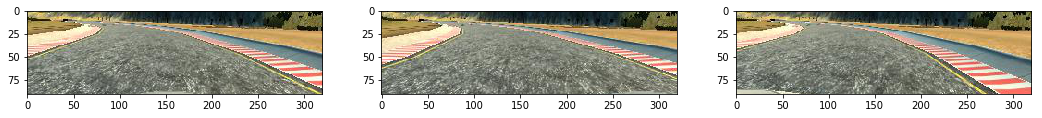

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,12))
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(images[i,50:140,:,:])

In [6]:
images = np.concatenate([images,np.fliplr(images)])

In [7]:
measurements = np.concatenate([measurements, -measurements])

In [8]:
from keras.models import Sequential, Model
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout, Cropping2D, Lambda
# set up lambda layer
model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(
    cropping=((50,20), (0,0)), 
    data_format='channels_last'
))
model.add(Conv2D(3, (5,5), strides=1, activation='relu'))
model.add(Conv2D(24, (5,5), strides=2, activation='relu'))
model.add(Conv2D(36, (5,5), strides=2, activation='relu'))
model.add(Conv2D(48, (5,5), strides=2, activation='relu'))
model.add(Conv2D(64, (3,3), strides=2, activation='relu'))
model.add(Conv2D(64, (3,3), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 86, 316, 3)        228       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 156, 24)       1824      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 76, 36)        21636     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 36, 48)         43248     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 17, 64)         27712     
__________

In [9]:
history = model.fit(
    images, 
    measurements, 
    validation_split=0.2, 
    shuffle=True,
    epochs=10,
    batch_size=128
)

Train on 102979 samples, validate on 25745 samples
Epoch 1/10
102979/102979 [==============================] - 66s 643us/step - loss: 0.0203 - val_loss: 0.0416
Epoch 2/10
102979/102979 [==============================] - 66s 638us/step - loss: 0.0113 - val_loss: 0.0430
Epoch 3/10
102979/102979 [==============================] - 65s 634us/step - loss: 0.0082 - val_loss: 0.0449
Epoch 4/10
102979/102979 [==============================] - 65s 631us/step - loss: 0.0067 - val_loss: 0.0425
Epoch 5/10
102979/102979 [==============================] - 66s 638us/step - loss: 0.0057 - val_loss: 0.0421
Epoch 6/10
102979/102979 [==============================] - 66s 637us/step - loss: 0.0050 - val_loss: 0.0423
Epoch 7/10
102979/102979 [==============================] - 65s 635us/step - loss: 0.0045 - val_loss: 0.0417
Epoch 8/10
102979/102979 [==============================] - 66s 638us/step - loss: 0.0041 - val_loss: 0.0429
Epoch 9/10
102979/102979 [==============================] - 66s 637us/step - 

In [10]:
model.save('model.h5')

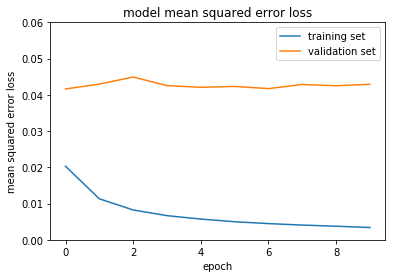

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.ylim(0,0.06)
plt.show()

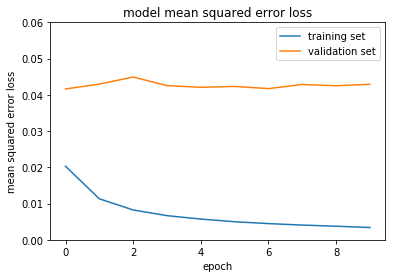

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.ylim(0,0.06)
plt.savefig('validation.png')